<a href="https://colab.research.google.com/github/vishva2410/Study-hour-prediction-Neural-Network-/blob/main/Student_weekly_study_hour_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split


In [ ]:
df = pd.read_csv('student-scores.csv')
df.head(5)

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76


In [7]:
df.drop('id',axis=1,inplace=True)
df.drop('career_aspiration',axis=1,inplace=True)

In [8]:
x = df.drop('weekly_self_study_hours',axis=1)
y = df['weekly_self_study_hours']

In [9]:
le = LabelEncoder()
x['gender'] = le.fit_transform(x['gender'])
x['part_time_job'] = le.fit_transform(x['part_time_job'])
x['extracurricular_activities'] = le.fit_transform(x['extracurricular_activities'])

In [10]:
sc = StandardScaler()
x = sc.fit_transform(x)
y = sc.fit_transform(np.array(y).reshape(-1,1))

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=32)

In [32]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation='relu',input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss=tf.keras.losses.Huber(delta=1.0),
    metrics=['mae', 'mse']
)


In [34]:
history = model.fit(x_train,y_train,epochs=150,batch_size=22,validation_split=0.1)

Epoch 1/150
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.4792 - mae: 0.8824 - mse: 1.0765 - val_loss: 0.3878 - val_mae: 0.7888 - val_mse: 0.8301
Epoch 2/150
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4010 - mae: 0.7983 - mse: 0.8565 - val_loss: 0.3530 - val_mae: 0.7333 - val_mse: 0.7621
Epoch 3/150
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3646 - mae: 0.7457 - mse: 0.7889 - val_loss: 0.3557 - val_mae: 0.7303 - val_mse: 0.7695
Epoch 4/150
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3366 - mae: 0.7091 - mse: 0.7259 - val_loss: 0.3506 - val_mae: 0.7223 - val_mse: 0.7545
Epoch 5/150
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3312 - mae: 0.7064 - mse: 0.7092 - val_loss: 0.3469 - val_mae: 0.7226 - val_mse: 0.7415
Epoch 6/150
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3454 - mae: 0.7230 - mse: 0.7362 - val_loss: 0.3443 - val_mae: 0.7178 - val_mse: 0.7365
Epoch 7/150
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3420 - mae: 0.7200 - mse: 0.7280 - val_loss: 

In [35]:
y_pred = model.predict(x_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [36]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2}")


Mean Absolute Error (MAE): 0.6837975531148126
R-squared (R2): 0.25091988107705954


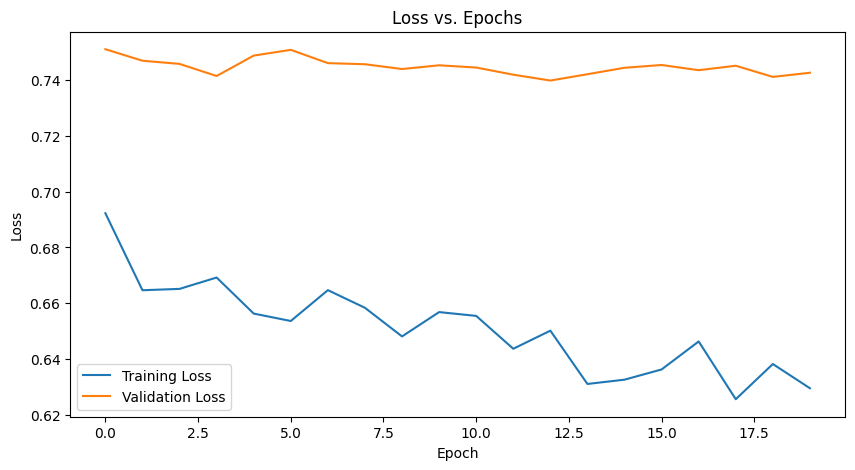

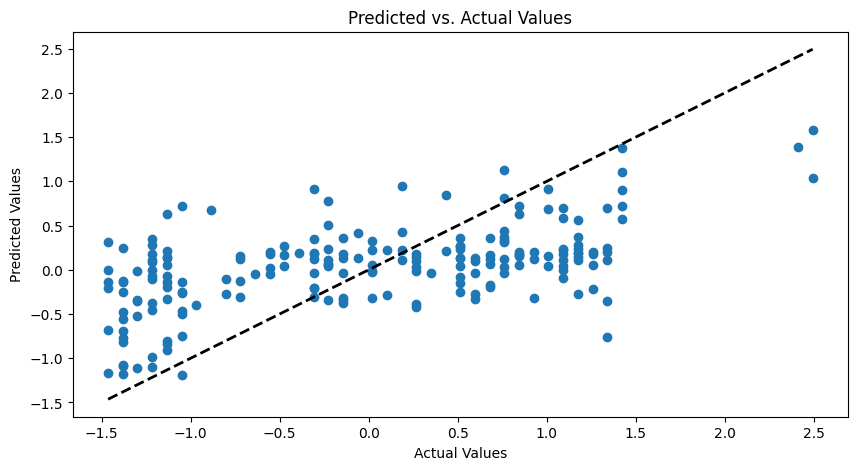

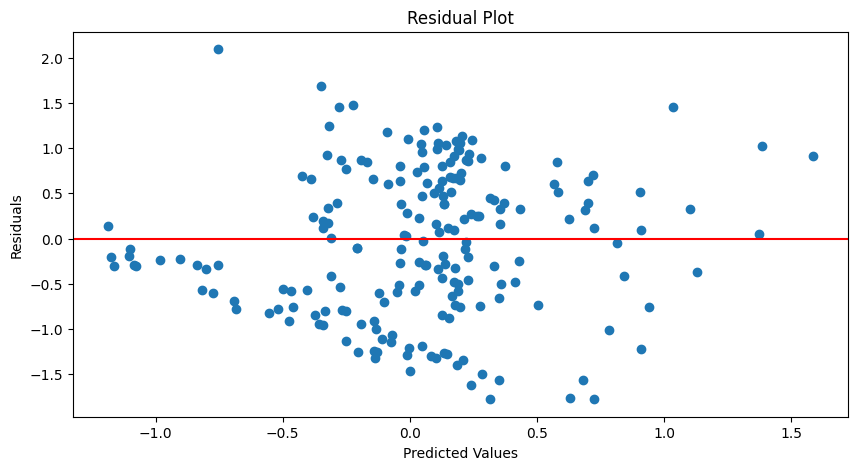

In [24]:
# Plots
# 1. Loss vs. Epochs
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 2. Predicted vs. Actual Values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Diagonal line
plt.title('Predicted vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# 3. Residual Plot (Optional)
residuals = y_test - y_pred
plt.figure(figsize=(10, 5))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

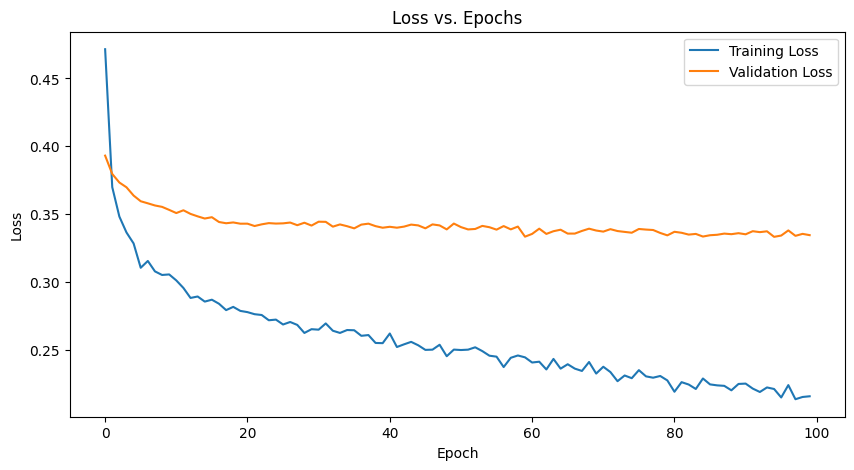

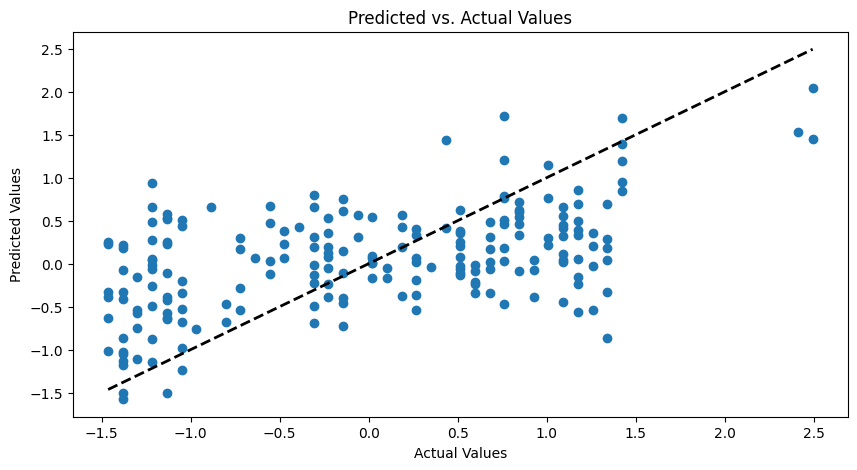

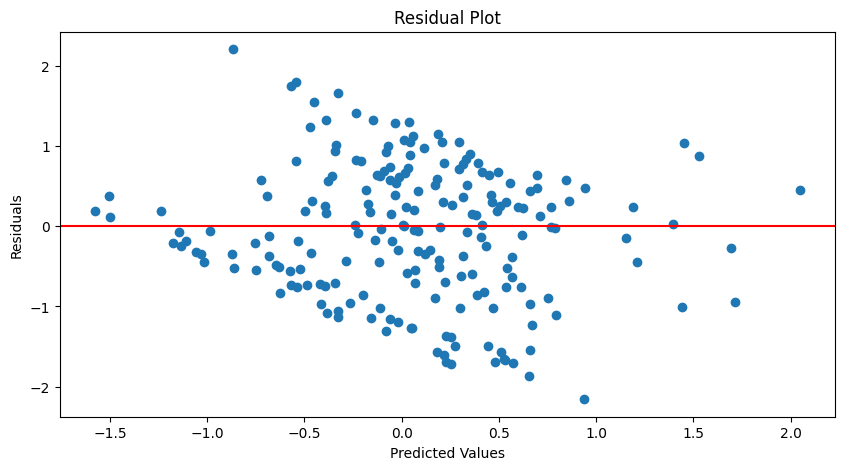

In [31]:
# Plots
# 1. Loss vs. Epochs
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 2. Predicted vs. Actual Values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Diagonal line
plt.title('Predicted vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# 3. Residual Plot (Optional)
residuals = y_test - y_pred
plt.figure(figsize=(10, 5))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

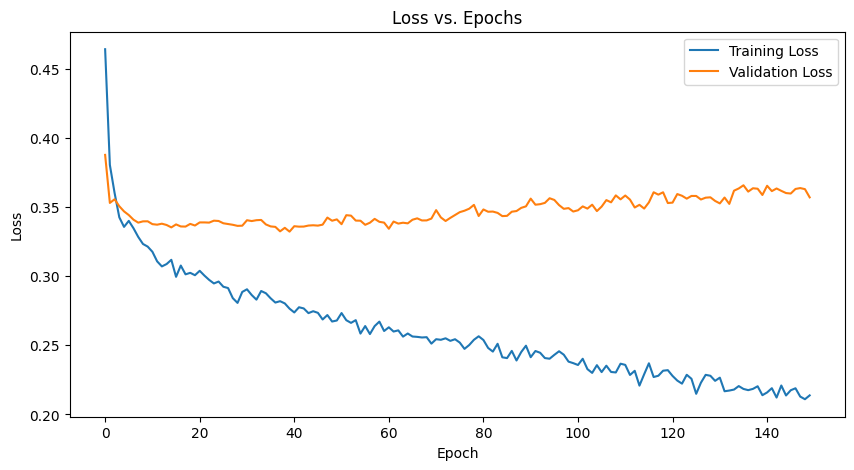

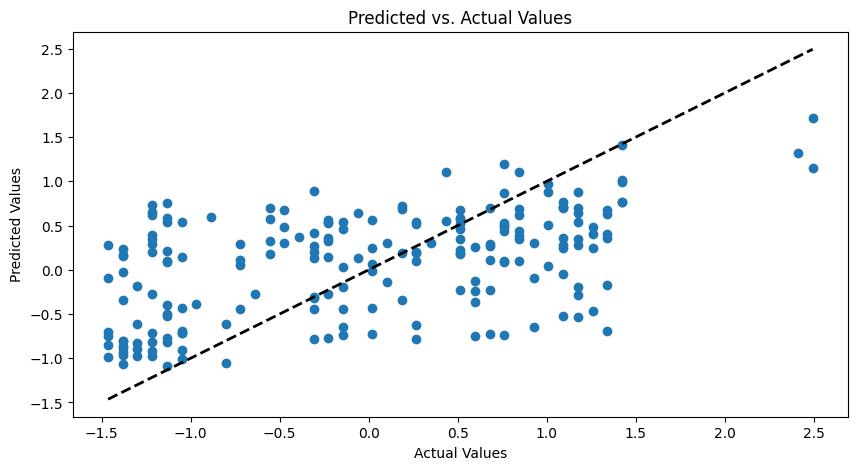

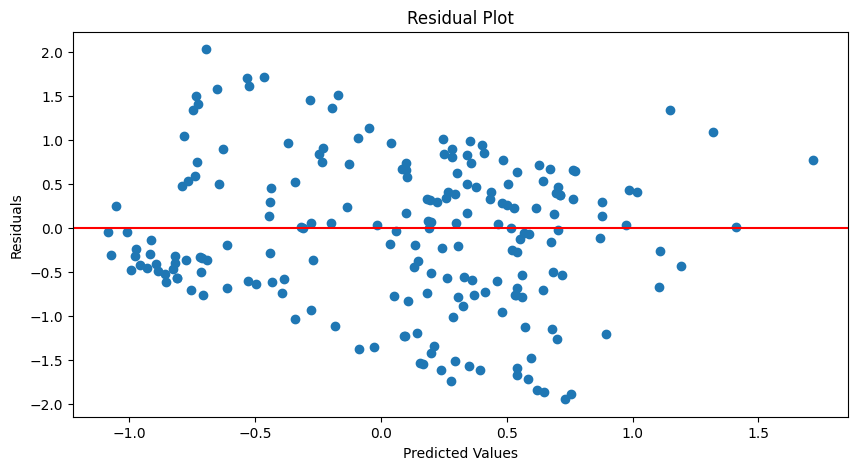

In [37]:
# Plots
# 1. Loss vs. Epochs
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 2. Predicted vs. Actual Values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Diagonal line
plt.title('Predicted vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# 3. Residual Plot (Optional)
residuals = y_test - y_pred
plt.figure(figsize=(10, 5))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [38]:
# linear regression comparison
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)

Neural Network:
  Mean Absolute Error (MAE): 0.6837975531148126
  R-squared (R2): 0.25091988107705954
Linear Regression:
  Mean Absolute Error (MAE): 0.6880392502705033
  R-squared (R2): 0.2795466709813007


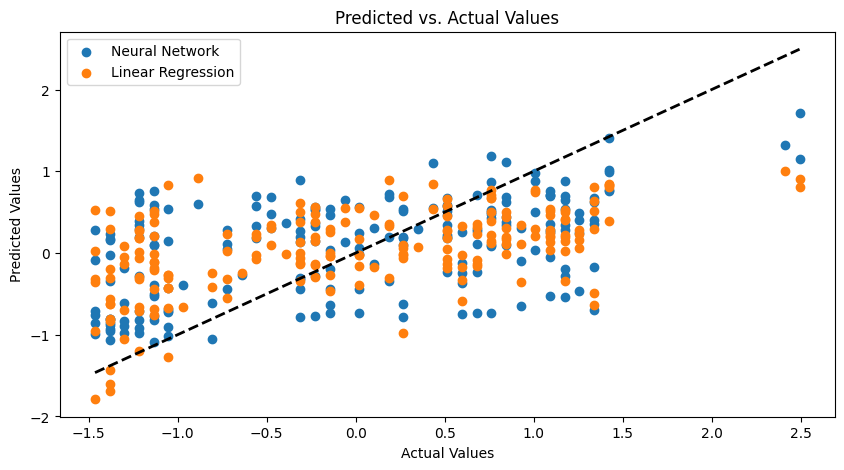

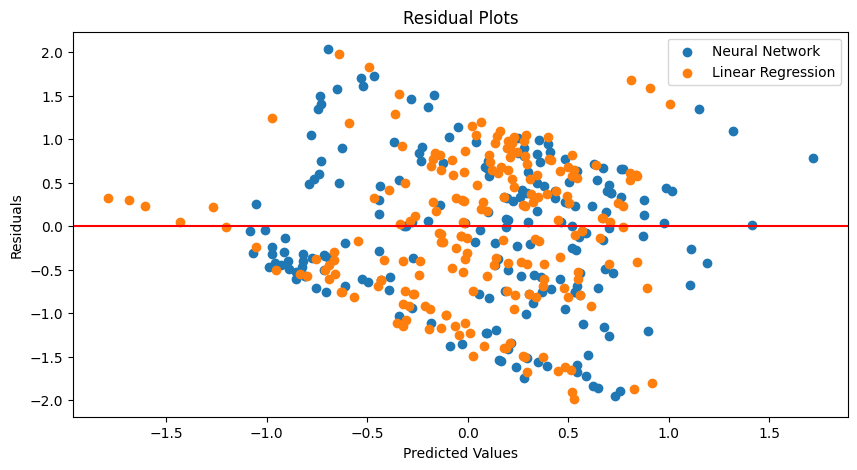

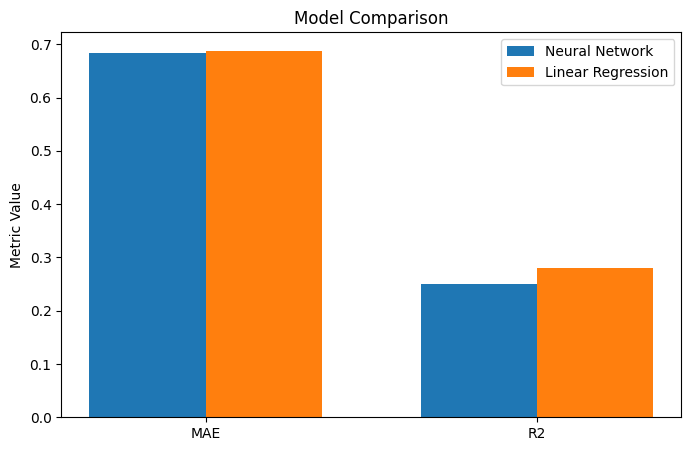

In [44]:
# Evaluate and compare the models
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name}:")
    print(f"  Mean Absolute Error (MAE): {mae}")
    print(f"  R-squared (R2): {r2}")
    return mae, r2

# Assign the neural network predictions to y_pred_nn
y_pred_nn = y_pred  # Assuming 'y_pred' holds the neural network predictions
mae_nn, r2_nn = evaluate_model(y_test, y_pred_nn, "Neural Network")
mae_lr, r2_lr = evaluate_model(y_test, y_pred_lr, "Linear Regression")

# ... (Rest of the code remains the same)
# Plots for comparison

# 1. Predicted vs. Actual Values (Both models)
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_nn, label='Neural Network')
plt.scatter(y_test, y_pred_lr, label='Linear Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Predicted vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# 2. Residual Plots (Both models)
plt.figure(figsize=(10, 5))
plt.scatter(y_pred_nn, y_test - y_pred_nn, label='Neural Network')
plt.scatter(y_pred_lr, y_test - y_pred_lr, label='Linear Regression')
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plots')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# 3. Bar plot comparing MAE and R2
metrics = ['MAE', 'R2']
nn_values = [mae_nn, r2_nn]
lr_values = [mae_lr, r2_lr]

x_pos = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x_pos, nn_values, width, label='Neural Network')
plt.bar(x_pos + width, lr_values, width, label='Linear Regression')
plt.xticks(x_pos + width / 2, metrics)
plt.ylabel('Metric Value')
plt.title('Model Comparison')
plt.legend()
plt.show()